 # Moving Average

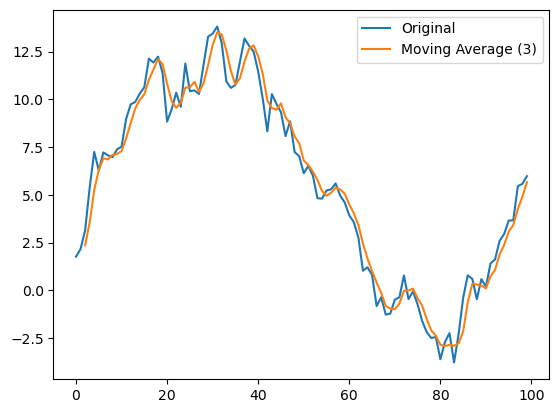

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy time series data
np.random.seed(0)
data = pd.Series(np.random.randn(100).cumsum())

# Moving Average with window size of 3
moving_avg = data.rolling(window=3).mean()

# Plotting
data.plot(label='Original')
moving_avg.plot(label='Moving Average (3)')
plt.legend()
plt.show()


#  Exponential Smoothing

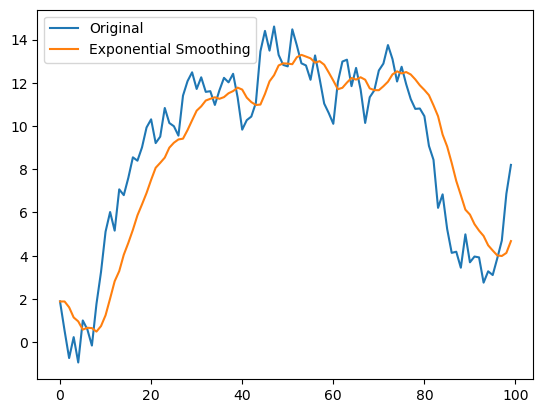

In [2]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Generate dummy time series data
data = pd.Series(np.random.randn(100).cumsum())

# Exponential Smoothing
model = SimpleExpSmoothing(data)
fitted_model = model.fit(smoothing_level=0.2, optimized=False)
exp_smooth = fitted_model.fittedvalues

# Plotting
data.plot(label='Original')
exp_smooth.plot(label='Exponential Smoothing')
plt.legend()
plt.show()


# ARIMA (AutoRegressive Integrated Moving Average)

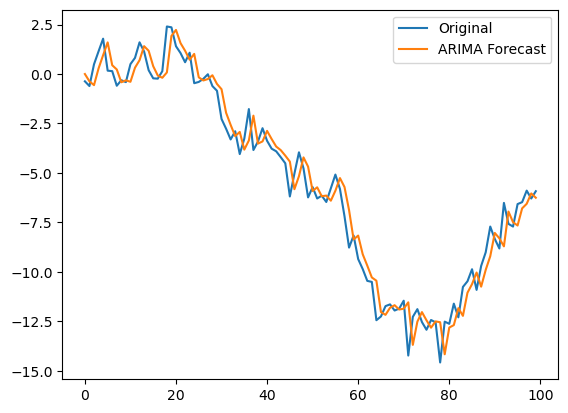

In [3]:
import statsmodels.api as sm

# Generate dummy time series data
data = pd.Series(np.random.randn(100).cumsum())

# ARIMA model
model = sm.tsa.ARIMA(data, order=(1, 1, 1))
fitted_model = model.fit()
arima_forecast = fitted_model.fittedvalues

# Plotting
data.plot(label='Original')
arima_forecast.plot(label='ARIMA Forecast')
plt.legend()
plt.show()


# Prophet

18:57:42 - cmdstanpy - INFO - Chain [1] start processing
18:57:42 - cmdstanpy - INFO - Chain [1] done processing
/home/nivedita/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/nivedita/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


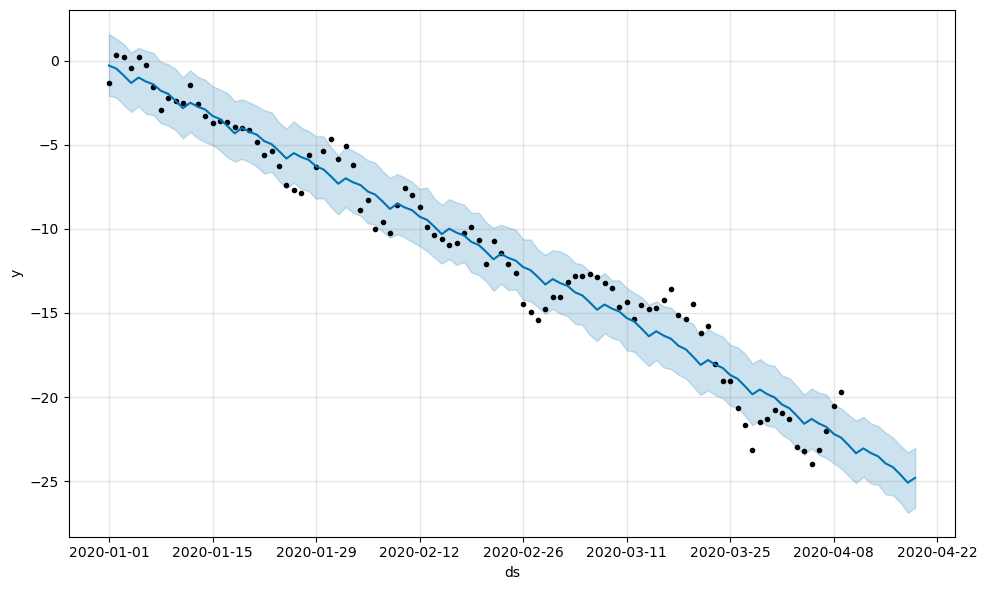

In [4]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy time series data
data = pd.DataFrame({'ds': pd.date_range(start='1/1/2020', periods=100),
                     'y': np.random.randn(100).cumsum()})

# Prophet model
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

# Plotting
fig = model.plot(forecast)
plt.show()


 # LSTM (Long Short-Term Memory)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate dummy time series data
data = np.random.randn(100).cumsum()
data = data.reshape(-1, 1)

# Prepare data for LSTM
timesteps = 10
X, y = [], []
for i in range(len(data) - timesteps):
    X.append(data[i:i + timesteps])
    y.append(data[i + timesteps])
X, y = np.array(X), np.array(y)

# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, verbose=0)

# Make predictions
preds = model.predict(X)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(range(timesteps, len(preds) + timesteps), preds, label='LSTM Predictions')
plt.legend()
plt.show()


2024-07-23 18:57:42.596965: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 18:57:42.598040: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 18:57:42.601805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 18:57:42.611458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 18:57:42.629539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [ ]:
#!pip install tensorflow


In [ ]:
#!pip install prophet


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Generate dummy time series data
data = np.random.randn(100).cumsum()
data = data.reshape(-1, 1)

# Prepare data for BiLSTM
timesteps = 10
X, y = [], []
for i in range(len(data) - timesteps):
    X.append(data[i:i + timesteps])
    y.append(data[i + timesteps])
X, y = np.array(X), np.array(y)

# BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(timesteps, 1)))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, verbose=0)

# Make predictions
preds = model.predict(X)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(range(timesteps, len(preds) + timesteps), preds, label='BiLSTM Predictions')
plt.legend()
plt.show()
